In [ ]:
#!pip install os
import os

# Define paths
supernatural_path = "/content/drive/MyDrive/SPN/"
bible_path = "/content/drive/MyDrive/Bibel/"

# Load Supernatural scripts
supernatural_scripts = {}
for file in os.listdir(supernatural_path):
    if file.endswith(".txt"):
        with open(os.path.join(supernatural_path, file), 'r', encoding='utf-8') as f:
            supernatural_scripts[file] = f.read()

# Load Bible text
bible_texts = {}
for file in os.listdir(bible_path):
    if file.endswith(".txt"):
        with open(os.path.join(bible_path, file), 'r', encoding='utf-8') as f:
            bible_texts[file] = f.read()

# Check data
print(f"Loaded {len(supernatural_scripts)} Supernatural scripts and {len(bible_texts)} Bible texts.")


Loaded 10 Supernatural scripts and 1 Bible texts.


 Text preprocessing
It includes cleaning the text: removal of stop words and lowercasing the texts.

In [ ]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary NLTK resources are downloaded
#nltk.download('punkt')  # Tokenizer
#nltk.download('stopwords')  # Stopwords list
# Ensure nltk data is properly downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', force=True)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', force=True)

# Additionally download 'punkt_tab'
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', force=True)

# Define paths to the directories containing the files
supernatural_path = "/content/SPN/"
bible_path = "/content/Bibel/"

# Define preprocessing function
def preprocess_text(text):
    # Remove director names, screenwriter names, and dates (common patterns)
    text = re.sub(r'(Directed by|Screenplay by|Written by).*?\n', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\d{4}-\d{2}-\d{2}', '', text)  # Remove dates in format YYYY-MM-DD
    text = re.sub(r'\[.*?\]', '', text)  # Remove instructions in square brackets
    text = re.sub(r'\([^)]*\)', '', text)  # Remove instructions in parentheses
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Load Supernatural scripts
supernatural_files = ["s4e1.txt", "s4e10.txt", "s5e1.txt", "s5e22.txt",
                      "s9e6.txt", "s14e1.txt", "s14e20.txt", "s15e19.txt", "s15e20.txt"]
supernatural_scripts = {}
for file in supernatural_files:
    filepath = os.path.join(supernatural_path, file)
    with open(filepath, 'r', encoding='utf-8') as f:
        supernatural_scripts[file] = f.read()

# Load Bible text
bible_file = "Bible_Am.txt"
bible_texts = {}
bible_filepath = os.path.join(bible_path, bible_file)
with open(bible_filepath, 'r', encoding='utf-8') as f:
    bible_texts[bible_file] = f.read()

# Preprocess Supernatural scripts
preprocessed_supernatural = {key: preprocess_text(value) for key, value in supernatural_scripts.items()}

# Preprocess Bible text
preprocessed_bible = {key: preprocess_text(value) for key, value in bible_texts.items()}

# Verify preprocessing
print("Preprocessed Supernatural Scripts:")
for key, tokens in preprocessed_supernatural.items():
    print(f"{key}: {tokens[:20]}...")  # Print first 20 tokens for brevity

print("\nPreprocessed Bible Texts:")
for key, tokens in preprocessed_bible.items():
    print(f"{key}: {tokens[:20]}...")  # Print first 20 tokens for brevity


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Preprocessed Supernatural Scripts:
s4e1.txt: ['lazarus', 'rising', 'see', 'quick', 'flashes', 'dean', 'tormented', 'eyes', 'flicking', 'back', 'forth', 'face', 'covered', 'blood', 'cut', 'dean', 'dark', 'place', 'breathes', 'heavily']...
s4e10.txt: ['heaven', 'hell', 'sam', 'want', 'anna', 'uriel', 'way', 'dean', 'whoa', 'whoa', 'whoa', 'okay', 'know', 'shes', 'wiretapping', 'angel', 'chats', 'whatever', 'reason', 'gank']...
s5e1.txt: ['sympathy', 'devil', 'chapel', 'int', 'chapel', 'night', 'visible', 'moment', 'demarcation', 'final', 'moments', 'lucifer', 'rising', 'first', 'moments', 'previouslies', 'sympathy', 'devil', 'dean', 'come']...
s5e22.txt: ['swan', 'song', 'act', 'one', 'voiceover', 'chuck', 'april', 'millionth', 'gm', 'vehicle', 'rolled', 'line', 'plant', 'janesville', 'blue', 'twodoor', 'caprice', 'big', 'ceremony', 'speeches']...
s9e6.txt: ['heaven', 'cant', 'wait', 'dean', 'reverend', 'buddy', 'boyles', 'goin', 'glory', 'hour', 'rev', 'buddy', 'boyle', 'angels', 'come'

Keyword search

I took the basic word which are associated with the Bibel and the series

In [ ]:
# Keyword list for Biblical references
keywords = ['god', 'angel', 'heaven', 'hell', 'demon', 'bible', 'apocalypse', 'sin', 'brother', 'sacrifice', 'soul', 'posession']

# Function to search for keywords
def keyword_search(text_tokens, keywords):
    found_keywords = [word for word in text_tokens if word in keywords]
    return found_keywords

# Search in scripts
keyword_references = {
    key: keyword_search(tokens, keywords) for key, tokens in preprocessed_supernatural.items()
}

# Print results
for script, references in keyword_references.items():
    print(f"{script}: Found references - {references}")

s4e1.txt: Found references - ['demon', 'hell', 'hell', 'demon', 'hell', 'brother', 'soul', 'hell', 'demon', 'hell', 'soul', 'demon', 'hell', 'hell', 'god', 'hell', 'hell', 'god', 'demon', 'hell', 'demon', 'demon', 'demon', 'sin', 'demon', 'hell', 'demon', 'demon', 'demon', 'demon', 'hell', 'demon', 'demon', 'demon', 'soul', 'demon', 'demon', 'demon', 'hell', 'demon', 'demon', 'hell', 'demon', 'hell', 'demon', 'hell', 'hell', 'brother', 'hell', 'angel', 'hell', 'angel', 'angel', 'hell', 'god', 'angel', 'hell', 'angel', 'angel', 'hell', 'god']
s4e10.txt: Found references - ['heaven', 'hell', 'angel', 'demon', 'angel', 'angel', 'god', 'demon', 'angel', 'angel', 'heaven', 'hell', 'angel', 'heaven', 'hell', 'angel', 'god', 'god', 'god', 'angel', 'demon', 'angel', 'heaven', 'hell', 'angel', 'hell', 'demon', 'angel', 'angel', 'angel', 'angel', 'hell', 'angel', 'angel', 'hell', 'angel', 'angel', 'hell', 'demon', 'demon', 'demon', 'demon', 'demon', 'angel', 'hell', 'god', 'god', 'angel', 'heave

In [ ]:
#extra key word search for Bibel
# Keyword list for Biblical references
keywords = ['god', 'angel', 'heaven', 'hell', 'demon', 'bible', 'apocalypse', 'sin', 'brother', 'sacrifice', 'soul', 'posession']

# Function to search for keywords
def keyword_search(text_tokens, keywords):
    found_keywords = [word for word in text_tokens if word in keywords]
    return found_keywords

# Search in Supernatural scripts
keyword_references_supernatural = {
    key: keyword_search(tokens, keywords) for key, tokens in preprocessed_supernatural.items()
}

# Search in Bible text
keyword_references_bible = {
    key: keyword_search(tokens, keywords) for key, tokens in preprocessed_bible.items()
}

# Print results for Supernatural scripts
print("Keyword References in Supernatural Scripts:")
for script, references in keyword_references_supernatural.items():
    print(f"{script}: Found references - {references}")

# Print results for Bible text
print("\nKeyword References in Bible Texts:")
for chapter, references in keyword_references_bible.items():
    print(f"{chapter}: Found references - {references}")



Keyword References in Supernatural Scripts:
s4e1.txt: Found references - ['demon', 'hell', 'hell', 'demon', 'hell', 'brother', 'soul', 'hell', 'demon', 'hell', 'soul', 'demon', 'hell', 'hell', 'god', 'hell', 'hell', 'god', 'demon', 'hell', 'demon', 'demon', 'demon', 'sin', 'demon', 'hell', 'demon', 'demon', 'demon', 'demon', 'hell', 'demon', 'demon', 'demon', 'soul', 'demon', 'demon', 'demon', 'hell', 'demon', 'demon', 'hell', 'demon', 'hell', 'demon', 'hell', 'hell', 'brother', 'hell', 'angel', 'hell', 'angel', 'angel', 'hell', 'god', 'angel', 'hell', 'angel', 'angel', 'hell', 'god']
s4e10.txt: Found references - ['heaven', 'hell', 'angel', 'demon', 'angel', 'angel', 'god', 'demon', 'angel', 'angel', 'heaven', 'hell', 'angel', 'heaven', 'hell', 'angel', 'god', 'god', 'god', 'angel', 'demon', 'angel', 'heaven', 'hell', 'angel', 'hell', 'demon', 'angel', 'angel', 'angel', 'angel', 'hell', 'angel', 'angel', 'hell', 'angel', 'angel', 'hell', 'demon', 'demon', 'demon', 'demon', 'demon', 'a

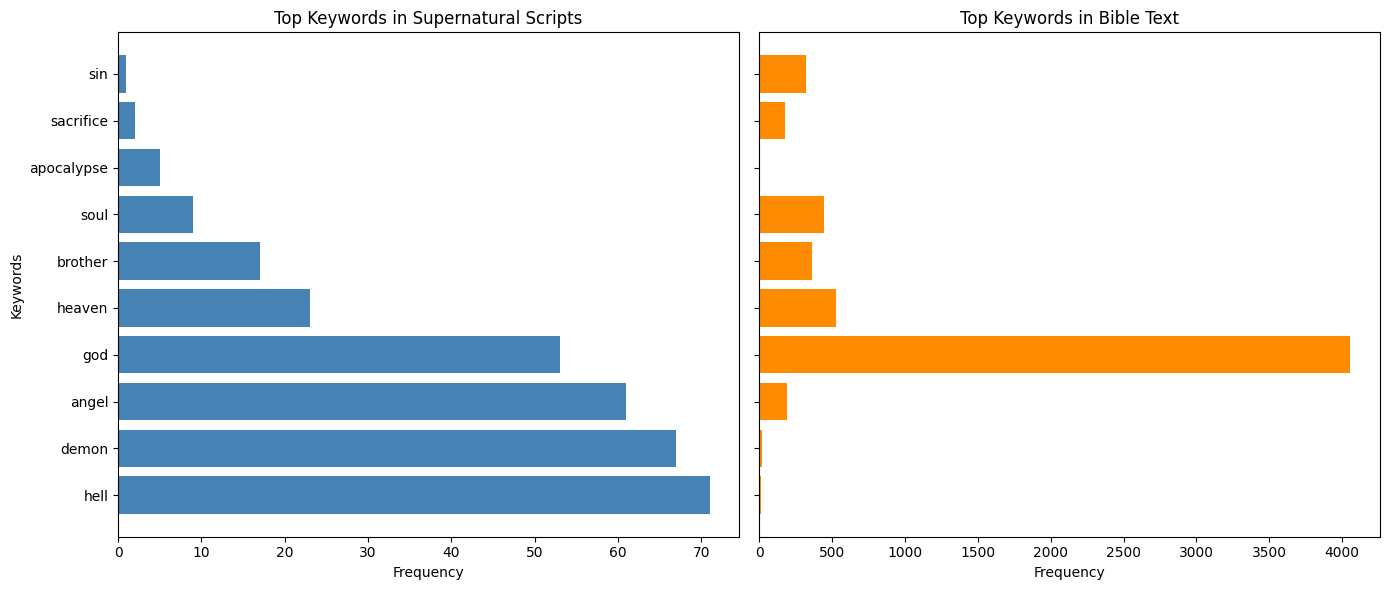

In [ ]:
#trying to visualize the key words
import matplotlib.pyplot as plt
from collections import Counter

# Count keyword occurrences in Supernatural scripts
keyword_counts_supernatural = Counter(
    word for references in keyword_references_supernatural.values() for word in references
)

# Count keyword occurrences in Bible texts
keyword_counts_bible = Counter(
    word for references in keyword_references_bible.values() for word in references
)

# Get the top keywords for visualization
top_keywords_supernatural = dict(keyword_counts_supernatural.most_common(10))  # Top 10 from Supernatural
top_keywords_bible = dict(keyword_counts_bible.most_common(10))  # Top 10 from Bible

# Create a bar chart for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Supernatural plot
axes[0].barh(list(top_keywords_supernatural.keys()), list(top_keywords_supernatural.values()), color='steelblue')
axes[0].set_title("Top Keywords in Supernatural Scripts")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Keywords")

# Bible plot
axes[1].barh(list(top_keywords_bible.keys()), list(top_keywords_bible.values()), color='darkorange')
axes[1].set_title("Top Keywords in Bible Text")
axes[1].set_xlabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Fuzzy Matching for Paraphrased Verses


Using fuzzywuzzy or difflib to find paraphrased Bible verses in scripts.

In [ ]:
!pip install rapidfuzz
from rapidfuzz import fuzz

# Function for fuzzy matching with more relaxed thresholds
def find_paraphrased_verses(script_lines, bible_lines, threshold=50):
    matches = []
    for bible_line in bible_lines:
        for script_line in script_lines:
            # Using a different type of fuzzy matching (token_sort_ratio) to account for rearranged words
            similarity = fuzz.token_sort_ratio(script_line, bible_line)
            if similarity > threshold:
                matches.append((script_line, bible_line, similarity))
    return matches

# Script lines
script_lines = [
    "God has a plan for everyone.",
    "The end is coming soon.",
    "Demons walk among us."
]

# Bible lines
bible_lines = [
    "For I know the plans I have for you, declares the Lord.",
    "The day of the Lord will come like a thief in the night.",
    "Beware of false prophets, who come to you in sheep’s clothing."
]

# Perform fuzzy matching with the adjusted threshold
matches = find_paraphrased_verses(script_lines, bible_lines, threshold=50)

# Print results
print("\nFuzzy Matches (Threshold 50):")
if matches:
    for script_line, bible_line, similarity in matches:
        print(f"Script: '{script_line}'")
        print(f"Bible:  '{bible_line}'")
        print(f"Similarity: {similarity}%\n")
else:
    print("No matches found.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00

Fuzzy Matches (Threshold 50):
No matches found.


In [ ]:
# Example: Compare one script to one Bible text
script = preprocessed_supernatural[list(preprocessed_supernatural.keys())[0]]
bible = preprocessed_bible[list(preprocessed_bible.keys())[0]]

paraphrased_matches = find_paraphrased_verses(script, bible)

# Display results
print("Paraphrased Matches:")
for match in paraphrased_matches:
    print(match)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
('lets', 'let', 85.71428571428572)
('east', 'let', 57.14285714285714)
('nest', 'let', 57.14285714285714)
('next', 'let', 57.14285714285714)
('bullet', 'let', 66.66666666666667)
('lets', 'let', 85.71428571428572)
('let', 'let', 100.0)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('nest', 'let', 57.14285714285714)
('like', 'let', 57.14285714285714)
('like', 'let', 57.14285714285714)
('lets', 'let', 85.71428571428572)
('get', 'let', 66.66666666666667)
('like', 'let', 57.14285714285714)
('like', 'let', 57.14285714285714)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('get', 'let', 66.66666666666667)
('like', 'let', 57.14285714285714)
('like', 'let', 57.14285714285714)
('let', 'let', 100.0)
('get', 'let', 66.66666666666667)
('lost', 'let', 57.14285714285714)
('get', 'let', 66.6666

 Named Entity Recognition (NER)

In [ ]:
import spacy

# Load pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Example: Extract entities from one script
entities = extract_named_entities(supernatural_scripts[list(supernatural_scripts.keys())[0]])

# Print results
print("Named Entities:")
print(entities)


Named Entities:
[('15.20', 'CARDINAL'), ('Andrew Dabb', 'PERSON'), ('Robert Singer', 'PERSON'), ('November 19, 2020', 'DATE'), ('8:00', 'TIME'), ('Dean', 'PERSON'), ('DEAN', 'ORG'), ('Ohhhh', 'PERSON'), ('Dean', 'PERSON'), ('morning', 'TIME'), ('Van Morrison', 'PERSON'), ('their morning', 'TIME'), ('Sam', 'PERSON'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('two', 'CARDINAL'), ('SAM', 'PERSON'), ('Dean', 'GPE'), ('DEAN', 'ORG'), ('Dean', 'PERSON'), ('Starts', 'PERSON'), ('Sam', 'PERSON'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('Dean', 'PERSON'), ('Sam', 'PERSON'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('Dean', 'PERSON'), ('Sam', 'PERSON'), ('Sam', 'PERSON'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('Miracle', 'ORG'), ('Combat', 'NORP'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('SAM', 'PERSON'), ('Dean', 'PERSON'), ('Dean', 'PERSON'), ('DEAN', 'ORG'), ('ONE', 'CARDINAL'), ('Impala', 'GPE'), ('Sam', 'PERSON'), ('Dean', 'PERSON'), ('43rd', 'ORDINAL'), ('DEAN', 'ORG'), ('Sam', 'PERSON'), ('D